# Overview of what I have done
 * 1.Understanding of the data
 * 2.Data Preproccessing for clean visulatization of data and feature Engineering
 * 3.Data Visulatization on preprocessed data for better understanding 
 * 4.Filling Misssing values:
      * 4.(a) I have drop some columns which is not necessary for prediction
      * 4.(b) After that I have used IterativeImputer and KNNImpute(best of them) to fill missing values
 * 5.Prediction of class 10,12,UG CGPA
 * 6.Predicting Stream Based on Skills of student using statistical model(like , Multinomial LogisticRegression)
 * 7.Prediction of Stream using Neural networks:
    * a.Tokenizer
    * b.pad_sequences
    * c.Embedding, LSTM
    * d.EarlyStopping,Adam Optimization
    * e.Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Applications_for_Machine_Sheet1.csv")

In [3]:
data

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,NaN,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,NaN,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,NaN,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,NaN,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,NaN,NaN,NaN,NaN
1132,NaN,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,NaN,NaN,NaN
1133,NaN,3,1,3,3,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,NaN,8.77/10,9.40/9.40,NaN
1134,NaN,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,NaN,7.90/10,90.00/90.00,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 14 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Name                                                                                               0 non-null      float64
 1   Python (out of 3)                                                                                  1136 non-null   int64  
 2   Machine Learning (out of 3)                                                                        1136 non-null   int64  
 3   Natural Language Processing (NLP) (out of 3)                                                       1136 non-null   int64  
 4   Deep Learning (out of 3)                                                                           1136 non-null   int64

# Data Preprocessing

# 1.Droping Name coloums becaues its not contain any thing

In [5]:
data2=data.drop("Name",axis=1)

In [6]:
data2.head()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00


# 2.converting, Are you available for 3 months, starting immediately, for a full-time work from home internship data in to '1 and 0'
 * 1 means Immediately available
 * 0 means Immediately not available
 

In [7]:
data2['Are you available for 3 months, starting immediately, for a full-time work from home internship? '].unique()

array(['Yes, I am available for 3 months starting immediately for a full-time internship.',
       'No, I am available full time but I have my exams in July which may continue for one week.',
       'No, Since I am a student , I am available for 3 months starting immediately for a part-time internship.',
       'No, I done in online mode only.',
       'No, I am Available, For Work From Home 3 Months Part Time Internship Because I Am A Student Of Engineering.',
       "No, I'm available after July since i have exams in 15 days .",
       'No, I have only one month time.',
       'No, As i am still in 7th sem of my degree i wont be available full time but i can work after college hours (except on days with tests/exams), so if you let me know the details of the work and the possible timings for it, it will allow me to manage my time according to it.',
       'No, I am Available for six months but I need to attend my exams subject to university conducting them. .',
       "No, I'm availab

In [8]:
def available(text):
    ans = 1
    text2 = text[:2]
    if text2.lower() == 'no':
        ans = 0
    return ans

In [9]:
data2['Are you available for 3 months, starting immediately, for a full-time work from home internship? ']=data['Are you available for 3 months, starting immediately, for a full-time work from home internship? '].apply(available)

In [10]:
data2['Are you available for 3 months, starting immediately, for a full-time work from home internship? '].unique()

array([1, 0], dtype=int64)

# 3.Modifing columns data of Performance on basis of CGPA on the scale of 10

In [11]:
data2[['Performance_PG','Performance_UG','Performance_12','Performance_10']]

,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,6.50/7,NaN,NaN
1,NaN,8.90/10,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,8.10/10,93.40/93.40,10.00/10.00
...,...,...,...,...
1131,NaN,NaN,NaN,NaN
1132,NaN,NaN,NaN,NaN
1133,NaN,8.77/10,9.40/9.40,NaN
1134,NaN,7.90/10,90.00/90.00,NaN


Splitting CGP/Percentage by removing it scale beacuse its 10 in clase of CGPA and 100 in Percentage

In [12]:
data2.loc[data2['Performance_UG'].notnull(), 'Performance_UG'] = data2.loc[data['Performance_UG'].notnull(), 'Performance_UG'].str.split('/').str[0]


data2.loc[data2['Performance_PG'].notnull(), 'Performance_PG'] = data2.loc[data['Performance_PG'].notnull(), 'Performance_PG'].str.split('/').str[0]


data2.loc[data2['Performance_12'].notnull(), 'Performance_12'] = data2.loc[data['Performance_12'].notnull(), 'Performance_12'].str.split('/').str[0]


data2.loc[data2['Performance_10'].notnull(), 'Performance_10'] = data2.loc[data['Performance_10'].notnull(), 'Performance_10'].str.split('/').str[0]


In [13]:
data2[['Performance_PG','Performance_UG','Performance_12','Performance_10']]

,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,6.50,NaN,NaN
1,NaN,8.90,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,85.60,10.00
4,NaN,8.10,93.40,10.00
...,...,...,...,...
1131,NaN,NaN,NaN,NaN
1132,NaN,NaN,NaN,NaN
1133,NaN,8.77,9.40,NaN
1134,NaN,7.90,90.00,NaN


In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 13 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Python (out of 3)                                                                                  1136 non-null   int64 
 1   Machine Learning (out of 3)                                                                        1136 non-null   int64 
 2   Natural Language Processing (NLP) (out of 3)                                                       1136 non-null   int64 
 3   Deep Learning (out of 3)                                                                           1136 non-null   int64 
 4   Other skills                                                                                       1070 non-null   object
 5  

`Converting Object to Float`

In [15]:
data2['Performance_UG'] = data2['Performance_UG'].astype(float)
data2['Performance_PG'] = data2['Performance_PG'].astype(float)
data2['Performance_12'] = data2['Performance_12'].astype(float)
data2['Performance_10'] = data2['Performance_10'].astype(float)

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 13 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Python (out of 3)                                                                                  1136 non-null   int64  
 1   Machine Learning (out of 3)                                                                        1136 non-null   int64  
 2   Natural Language Processing (NLP) (out of 3)                                                       1136 non-null   int64  
 3   Deep Learning (out of 3)                                                                           1136 non-null   int64  
 4   Other skills                                                                                       1070 non-null   objec

`Scalling Performance Value in CGAP from Percentage`

In [17]:
max_value = data2['Performance_12'].max()
max_value
max_value

99.83

In [18]:
def convert_to_cgpa(x):
    if pd.notnull(x):
        if float(x) > 10:
            cgpa = float(x) / 9.983
            return round(cgpa, 2)
        else:
            return x
    else:
        return x

data2['Performance_12'] = data2['Performance_12'].apply(convert_to_cgpa)
data2['Performance_10'] = data2['Performance_10'].apply(convert_to_cgpa)
data2['Performance_UG'] = data2['Performance_10'].apply(convert_to_cgpa)
data2['Performance_PG'] = data2['Performance_10'].apply(convert_to_cgpa)

In [19]:
data2['Performance_12']

0        NaN
1        NaN
2        NaN
3       8.57
4       9.36
        ... 
1131     NaN
1132     NaN
1133    9.40
1134    9.02
1135     NaN
Name: Performance_12, Length: 1136, dtype: float64

In [20]:
data3=data2
#changing columns name for convenient
data3.rename(columns={'Are you available for 3 months, starting immediately, for a full-time work from home internship? ': 'Immediately available'}, inplace=True)
data3.head()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,Immediately available,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",1,Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,NaN,NaN,NaN
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...",1,B.Tech,Computer Science & Engineering,2024,NaN,NaN,NaN,NaN
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...",1,Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",1,Bachelor of Engineering (B.E),NaN,2024,10.0,10.0,8.57,10.0
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...",1,B.Tech,Computer Science,2023,10.0,10.0,9.36,10.0


# 4.Data Visulatization On preprocessed data

`Lets see relationship between our data that how one CGPA are related with other.`

In [21]:
corr_matrix=data3.corr()
corr_matrix['Performance_PG'].sort_values(ascending=False)

Performance_PG                                  1.000000
Performance_UG                                  1.000000
Performance_10                                  0.854328
Performance_12                                  0.547359
Python (out of 3)                               0.126695
Machine Learning (out of 3)                     0.117023
Deep Learning (out of 3)                        0.096910
Natural Language Processing (NLP) (out of 3)    0.029309
Current Year Of Graduation                     -0.013810
Immediately available                          -0.099136
Name: Performance_PG, dtype: float64

<Axes: >

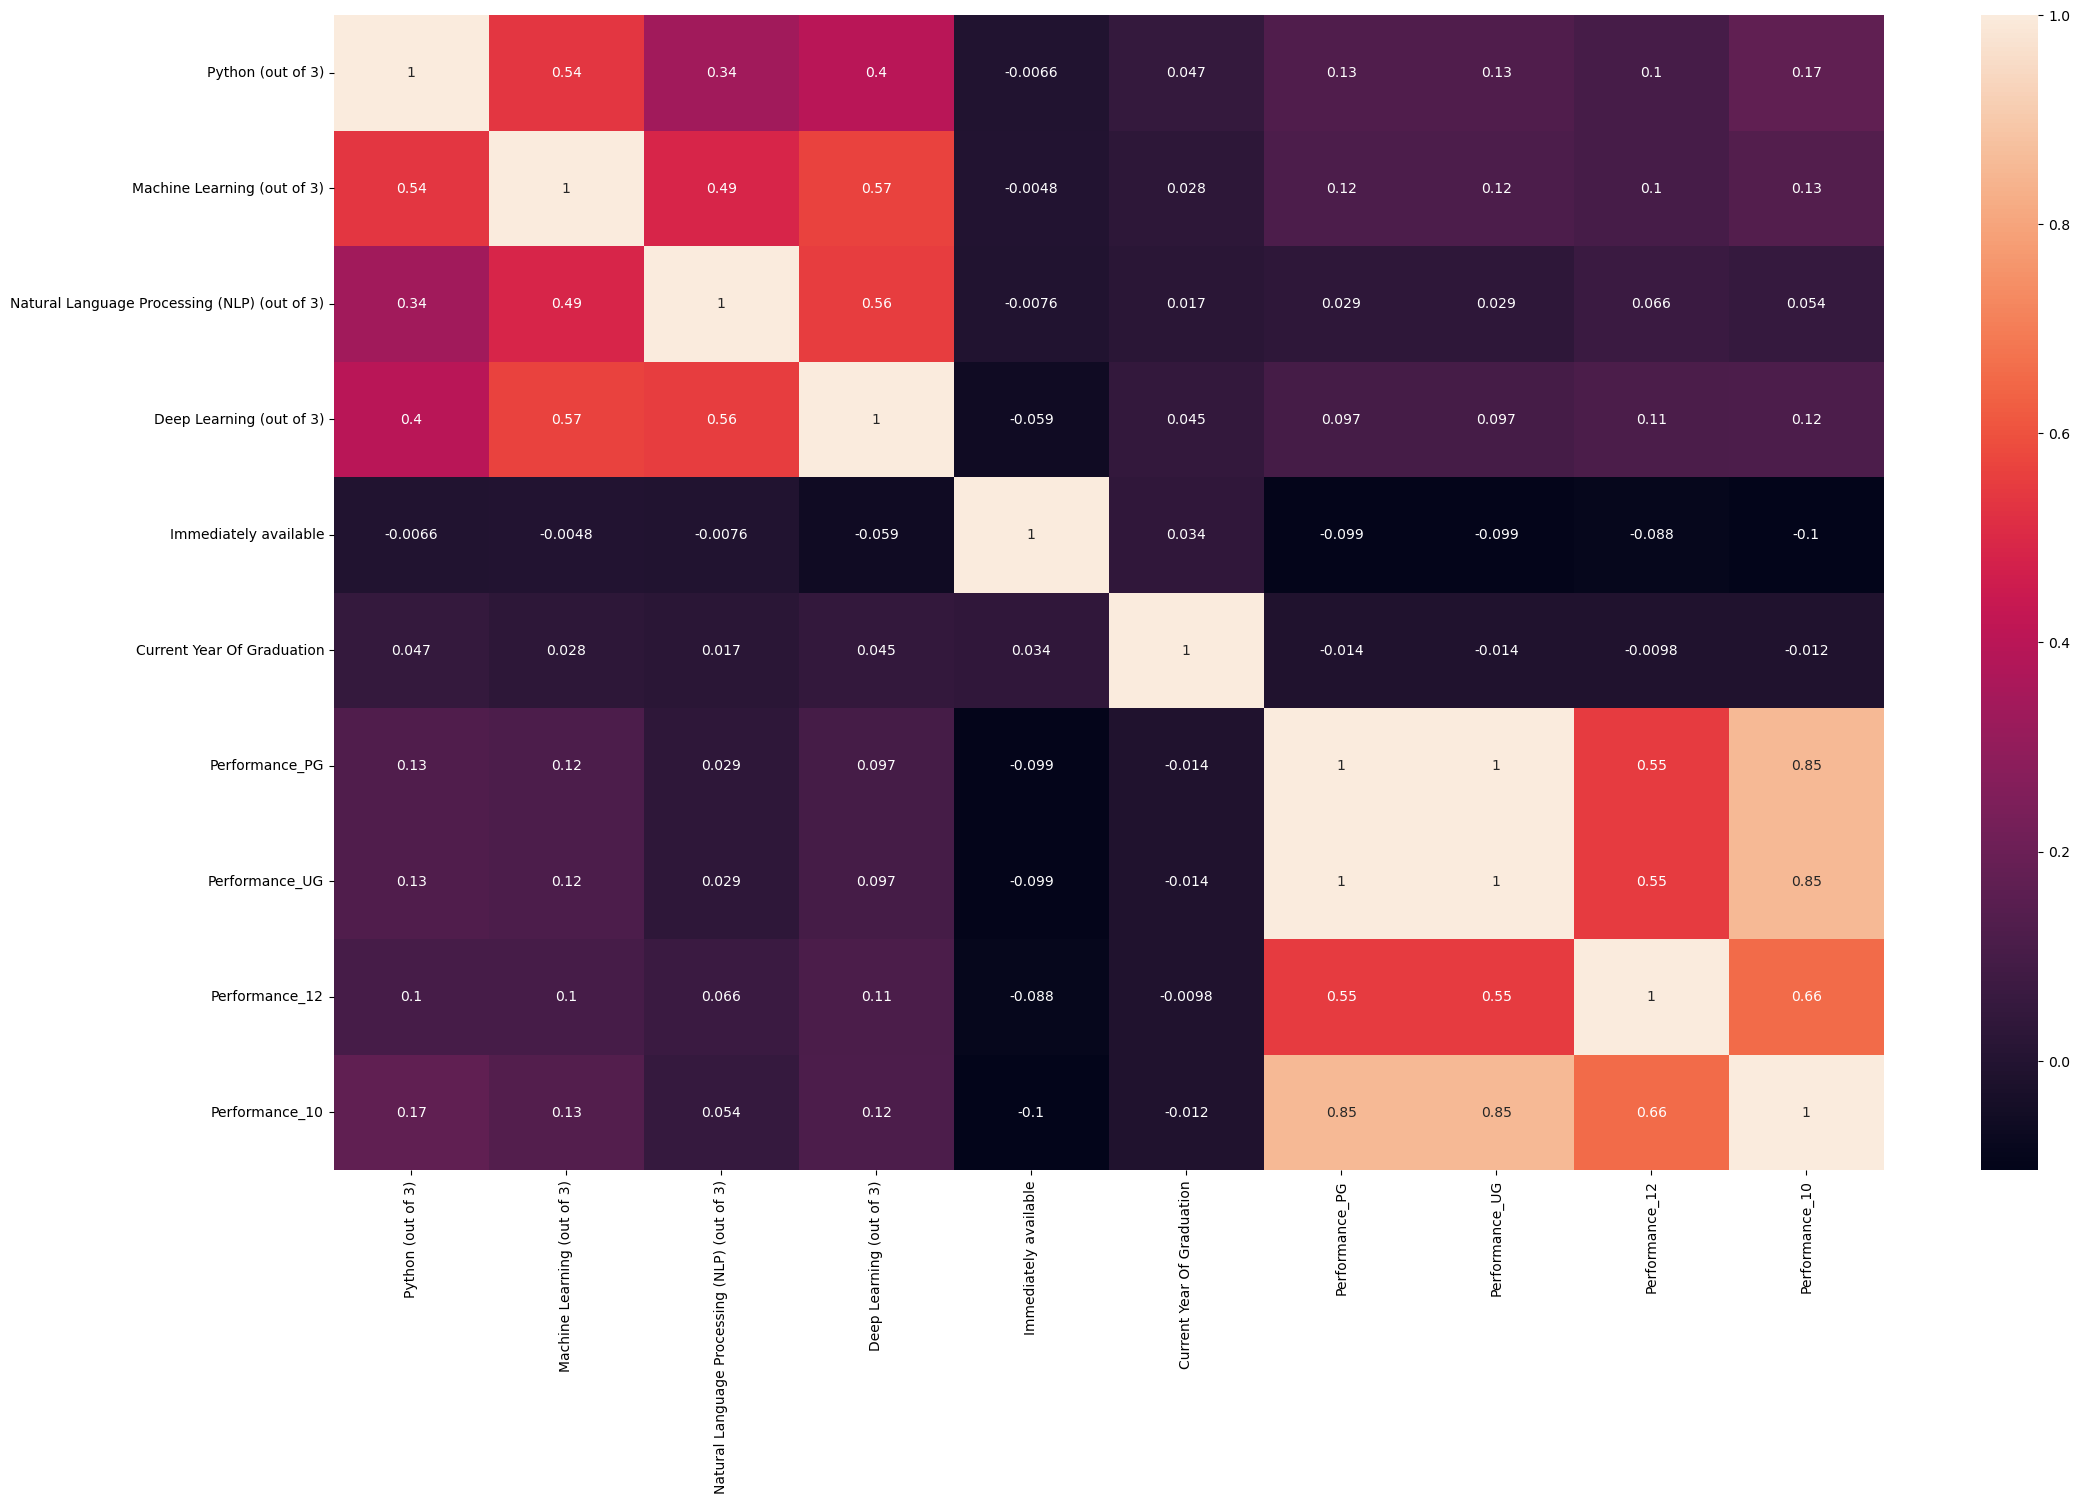

In [22]:
plt.figure(figsize=(25,15))
sn.heatmap(data3.corr(),annot=True)

`Lets Plot histogram of different different Performance score with frequency of students`

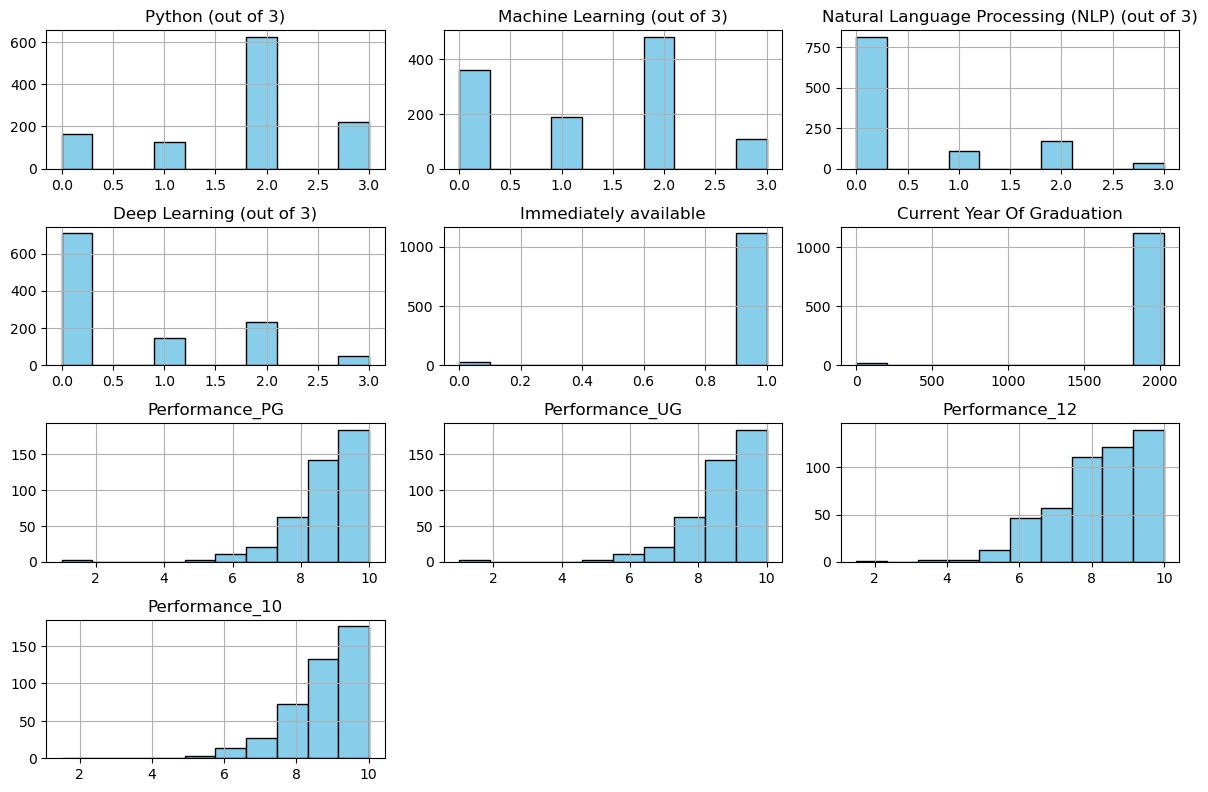

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
data3.hist(ax=ax, color='skyblue', edgecolor='black')

ax.set_title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout(pad=1)

# Show the plot
plt.show()

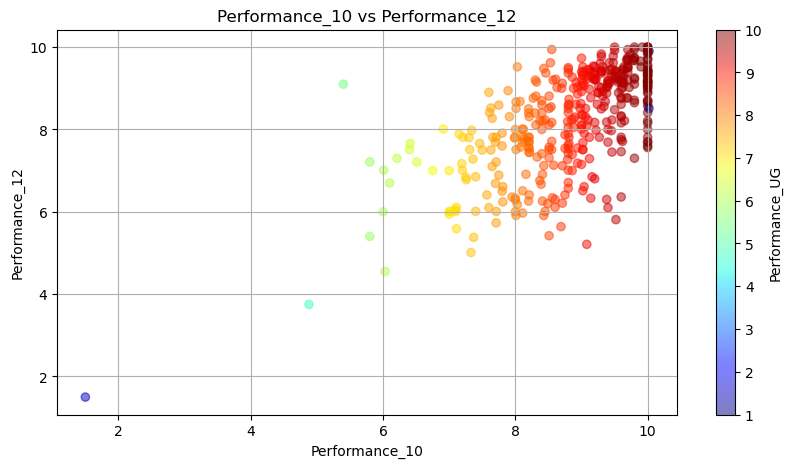

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(x = data3['Performance_10'],y = data3['Performance_12'], c=data3['Performance_PG'], cmap='jet', alpha=0.5)
#means that the color of each point in the scatter plot will be determined by the
#corresponding value in the 'Performance_UG' column.

plt.xlabel('Performance_10')
plt.ylabel('Performance_12')
plt.title('Performance_10 vs Performance_12')

plt.colorbar(label='Performance_UG')

plt.grid(True)

plt.show()


`lets see the most frequent Steam of applied students and their percentage`

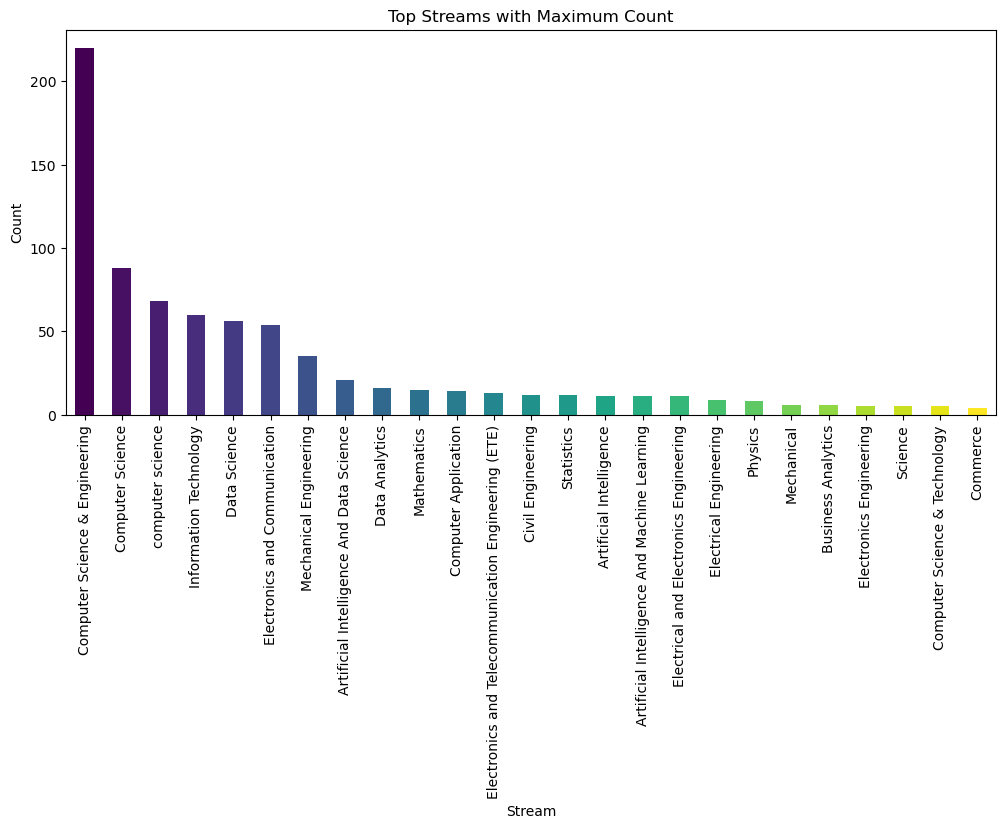

In [25]:
plt.figure(figsize=(12, 5))

unique_stream= data3['Stream'].value_counts()
top_streams = unique_stream.head(25)
cmap = plt.get_cmap('viridis', len(top_streams))
top_streams.plot(kind='bar', color=cmap(np.arange(len(top_streams))))

plt.title('Top Streams with Maximum Count')
plt.xlabel('Stream')
plt.ylabel('Count')

plt.show()


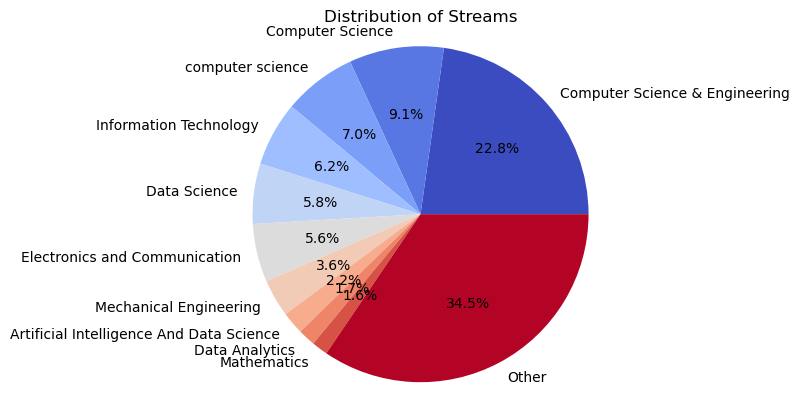

In [26]:
unique_stream = data3['Stream'].value_counts()

num_top_streams =10
top_streams = unique_stream.head(num_top_streams)
other_count = unique_stream[num_top_streams:].sum()

streams_to_plot = top_streams.append(pd.Series([other_count], index=['Other']))

colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(streams_to_plot)))
plt.pie(streams_to_plot, labels=streams_to_plot.index, colors=colors, autopct='%1.1f%%')

plt.title('Distribution of Streams')
plt.axis('equal')
plt.show()


`Year Of Graduation`

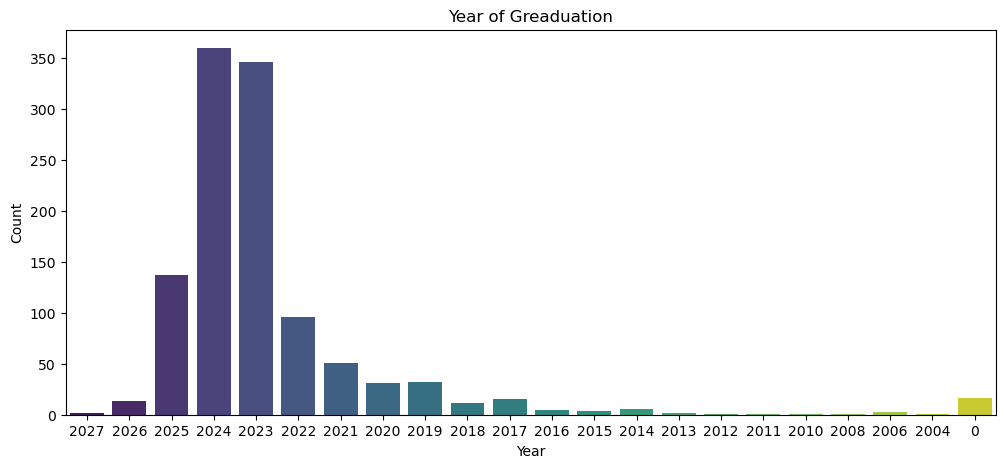

In [27]:
plt.figure(figsize=(12, 5))

year_counts = data3['Current Year Of Graduation'].value_counts()
sorted_years = year_counts.index.sort_values(ascending=False)
sn.countplot(data=data3, x='Current Year Of Graduation', order=sorted_years, palette='viridis')

plt.title('Year of Greaduation')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()


`In our data we have other skill columns containing extra skills,lets find out most common one using wordcloud`

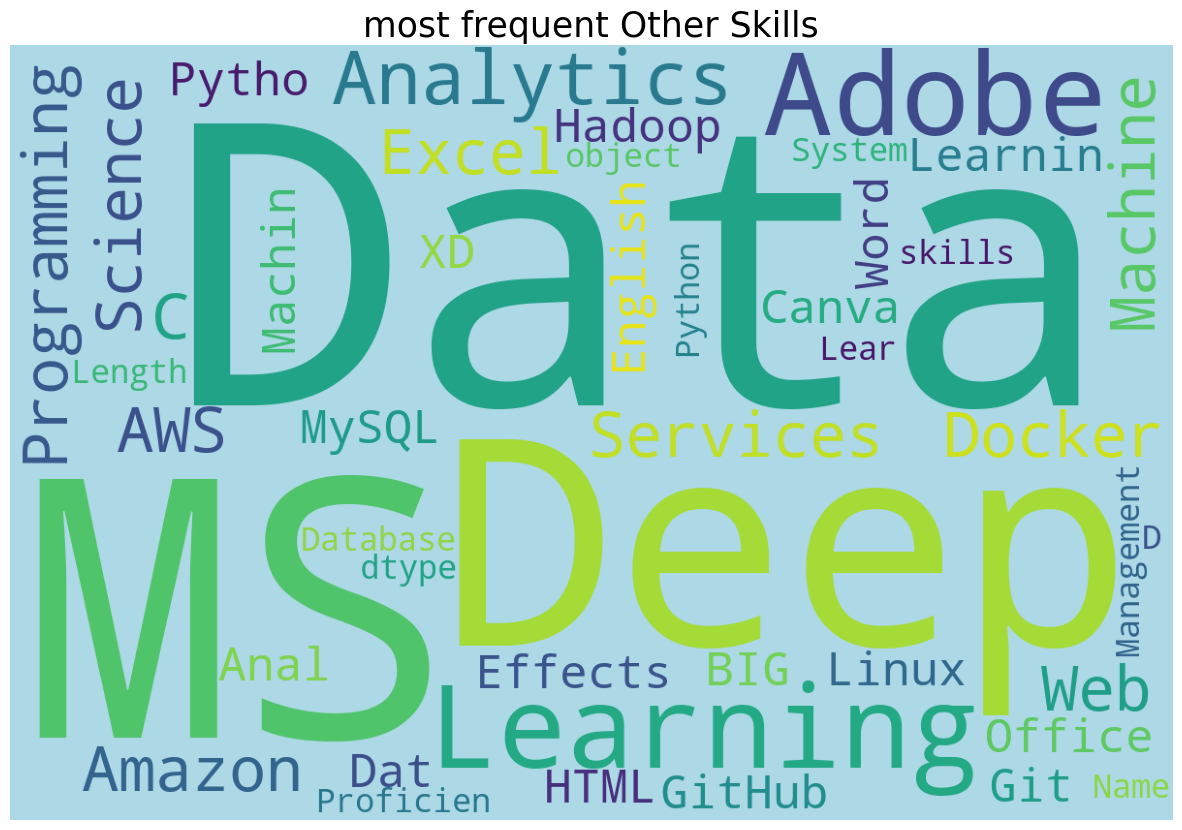

In [28]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data3['Other skills']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('most frequent Other Skills', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

`most frequent degree`

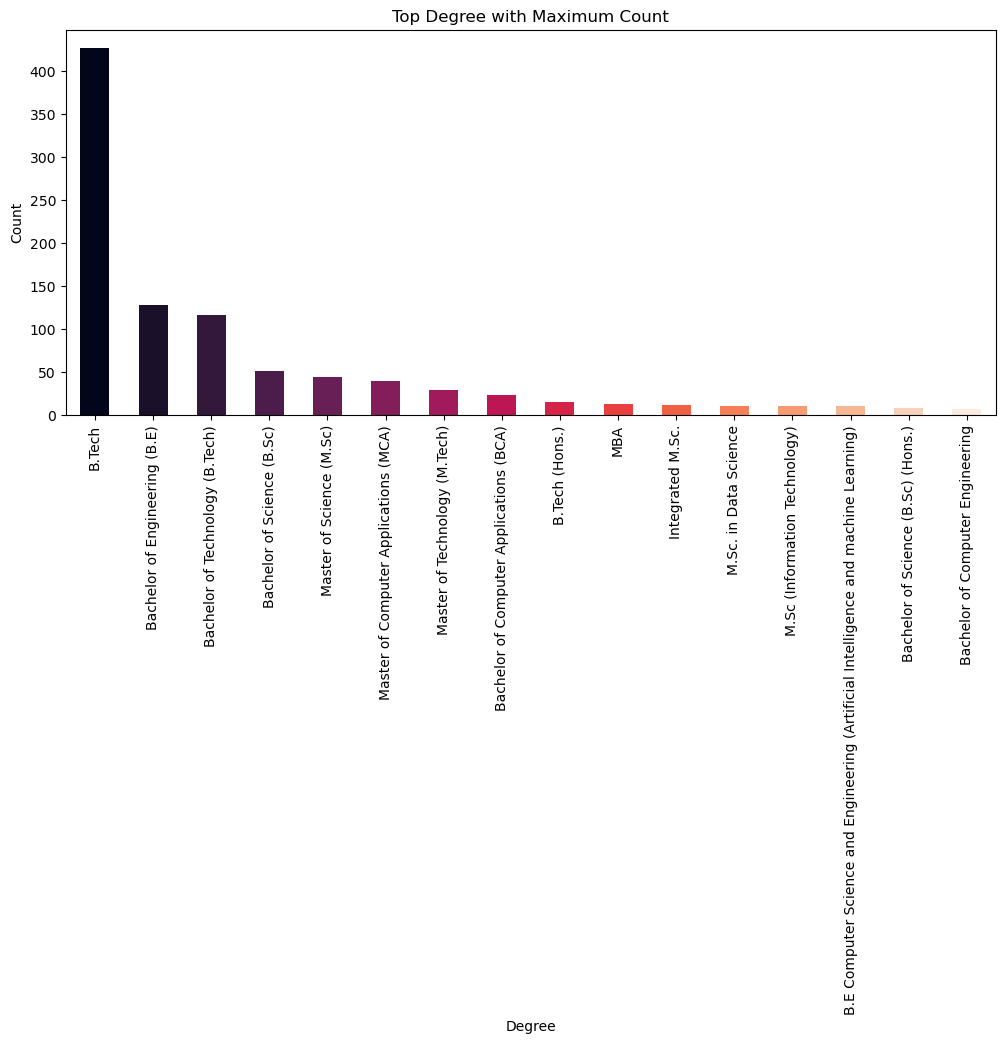

In [29]:
plt.figure(figsize=(12, 5))

unique_stream= data3['Degree'].value_counts()
top_streams = unique_stream.head(16)
cmap = plt.get_cmap('rocket', len(top_streams))
top_streams.plot(kind='bar', color=cmap(np.arange(len(top_streams))))

plt.title('Top Degree with Maximum Count')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()


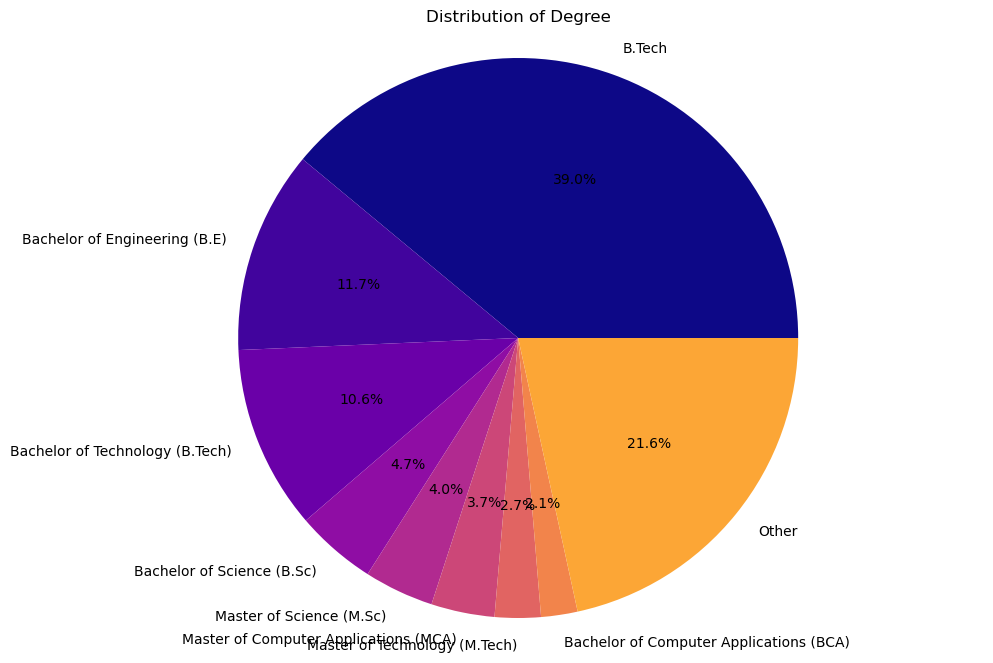

In [30]:
plt.figure(figsize=(12, 8))

unique_degree = data3['Degree'].value_counts()
num_top_streams =8
top_degree = unique_degree.head(num_top_streams)

other_count = unique_degree[num_top_streams:].sum()
degree_to_plot = top_degree.append(pd.Series([other_count], index=['Other']))
colors = plt.get_cmap('plasma')(np.linspace(0, 1, len(streams_to_plot)))

plt.pie(degree_to_plot, labels=degree_to_plot.index, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Degree')
plt.axis('equal')
plt.show()


# 5.Handling Missing Value for prediction because model will not work on NAN values

In [31]:
data3.isnull().sum()

Python (out of 3)                                 0
Machine Learning (out of 3)                       0
Natural Language Processing (NLP) (out of 3)      0
Deep Learning (out of 3)                          0
Other skills                                     66
Immediately available                             0
Degree                                           43
Stream                                          170
Current Year Of Graduation                        0
Performance_PG                                  709
Performance_UG                                  709
Performance_12                                  643
Performance_10                                  709
dtype: int64

In [32]:
data4 = data3.copy()
data4.head()
data4.dropna(subset=['Degree','Stream'], inplace=True)
data4.isnull().sum()


Python (out of 3)                                 0
Machine Learning (out of 3)                       0
Natural Language Processing (NLP) (out of 3)      0
Deep Learning (out of 3)                          0
Other skills                                     43
Immediately available                             0
Degree                                            0
Stream                                            0
Current Year Of Graduation                        0
Performance_PG                                  550
Performance_UG                                  550
Performance_12                                  495
Performance_10                                  550
dtype: int64

In [33]:
stream_series = pd.Series(data4["Degree"].unique())
stream_counts = stream_series.value_counts()
stream_counts


Bachelor of Vocation (B.Voc.)                      1
Bachelor of Computer Engineering                   1
B.tech Artificial Intelligence And Data Science    1
B.Sc                                               1
Master of Engineering (M.E)                        1
                                                  ..
Post Graduate Diploma                              1
M.Sc (Information Technology)                      1
ITI Electrical Engineering                         1
Ms In Data Science                                 1
Post Graduation Diploma                            1
Length: 74, dtype: int64

In [34]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 1135
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Python (out of 3)                             939 non-null    int64  
 1   Machine Learning (out of 3)                   939 non-null    int64  
 2   Natural Language Processing (NLP) (out of 3)  939 non-null    int64  
 3   Deep Learning (out of 3)                      939 non-null    int64  
 4   Other skills                                  896 non-null    object 
 5   Immediately available                         939 non-null    int64  
 6   Degree                                        939 non-null    object 
 7   Stream                                        939 non-null    object 
 8   Current Year Of Graduation                    939 non-null    int64  
 9   Performance_PG                                389 non-null    fl

In [35]:
data5=data4.drop(["Other skills","Degree","Stream"],axis=1)
data5.head(2)
#droping Degree and stream beacuse not required 

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Immediately available,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,1,0,0,1,1,2021,NaN,NaN,NaN,NaN
1,2,0,0,0,1,2024,NaN,NaN,NaN,NaN


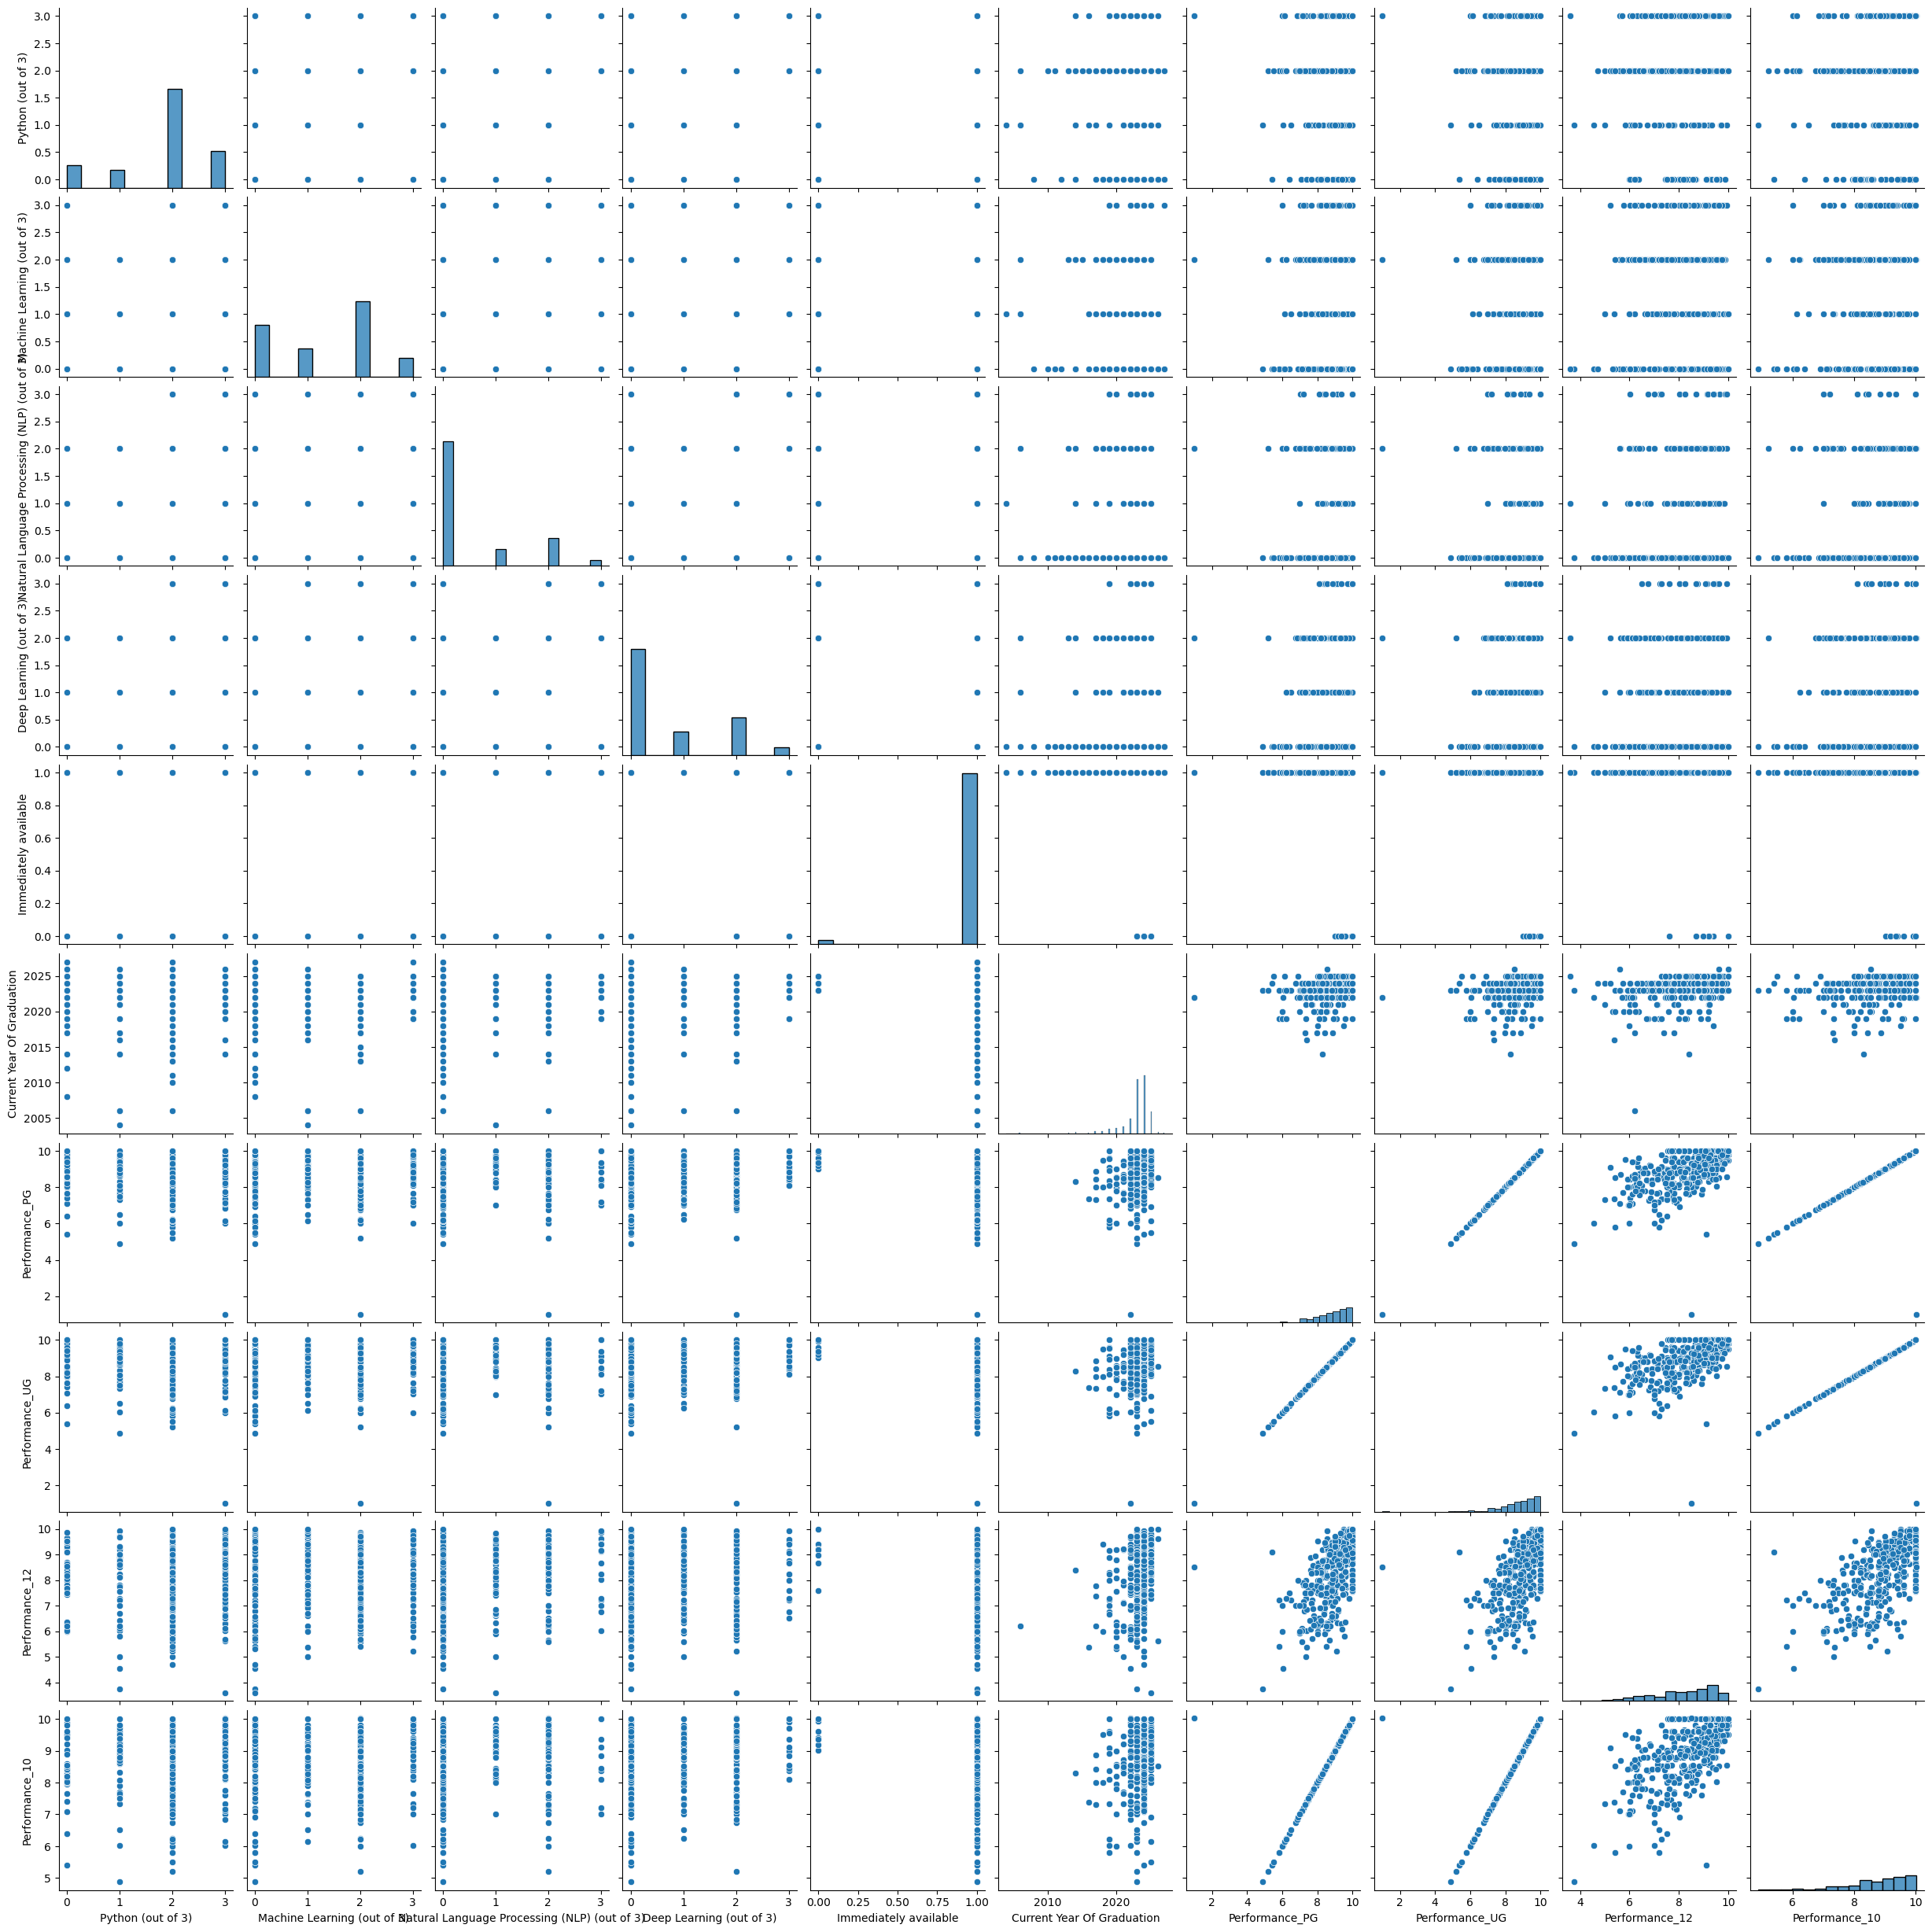

In [36]:
sn.pairplot(data4)

We can see that Performace columns are linear with each other some are less linear,some are perfectly linear

In [37]:
corr_matrix=data5.corr()
corr_matrix['Immediately available'].sort_values(ascending=False)

Immediately available                           1.000000
Natural Language Processing (NLP) (out of 3)   -0.017060
Machine Learning (out of 3)                    -0.019171
Python (out of 3)                              -0.024943
Deep Learning (out of 3)                       -0.078506
Performance_12                                 -0.082432
Current Year Of Graduation                     -0.089482
Performance_PG                                 -0.091395
Performance_UG                                 -0.091395
Performance_10                                 -0.094999
Name: Immediately available, dtype: float64

In [38]:
corr_matrix['Current Year Of Graduation'].sort_values(ascending=False)

Current Year Of Graduation                      1.000000
Performance_12                                  0.293900
Performance_PG                                  0.201488
Performance_UG                                  0.201488
Performance_10                                  0.199988
Python (out of 3)                               0.101013
Deep Learning (out of 3)                        0.080924
Machine Learning (out of 3)                     0.021873
Natural Language Processing (NLP) (out of 3)   -0.014745
Immediately available                          -0.089482
Name: Current Year Of Graduation, dtype: float64

correlation of `Immediately available` is close to 0 so we ca drop it 

In [39]:
data6=data5.drop(['Immediately available','Current Year Of Graduation'],axis=1)

In [40]:
corr_matrix['Performance_PG'].sort_values(ascending=False)

Performance_PG                                  1.000000
Performance_UG                                  1.000000
Performance_10                                  0.904541
Performance_12                                  0.561347
Current Year Of Graduation                      0.201488
Machine Learning (out of 3)                     0.090315
Python (out of 3)                               0.088943
Deep Learning (out of 3)                        0.065215
Natural Language Processing (NLP) (out of 3)   -0.002406
Immediately available                          -0.091395
Name: Performance_PG, dtype: float64

In [41]:
corr_matrix['Machine Learning (out of 3)'].sort_values(ascending=False)

Machine Learning (out of 3)                     1.000000
Deep Learning (out of 3)                        0.568319
Python (out of 3)                               0.520011
Natural Language Processing (NLP) (out of 3)    0.479435
Performance_10                                  0.110589
Performance_12                                  0.092091
Performance_PG                                  0.090315
Performance_UG                                  0.090315
Current Year Of Graduation                      0.021873
Immediately available                          -0.019171
Name: Machine Learning (out of 3), dtype: float64

# 6.IterativeImputer to fill missing values

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer

#missing_values = ['Performance_PG', 'Performance_UG', 'Performance_12', 'Performance_10']

#imputer = IterativeImputer(max_iter=10, random_state=0)

#data6[missing_values] = imputer.fit_transform(data6[missing_values])
#data6

In this data set KNNImputer work little more accurate then IterativeImputer 

In [44]:
from sklearn.impute import KNNImputer
missing_values = ['Performance_PG', 'Performance_UG', 'Performance_12', 'Performance_10']
imputer = KNNImputer(n_neighbors=10, weights='distance')
data6[missing_values] = imputer.fit_transform(data6[missing_values])
data6
#its giving little more acccurate result its beacuse of lots of missing value

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Performance_PG,Performance_UG,Performance_12,Performance_10
0,1,0,0,1,8.775321,8.775321,8.204077,8.798509
1,2,0,0,0,8.775321,8.775321,8.204077,8.798509
2,2,2,0,0,8.775321,8.775321,8.204077,8.798509
4,2,2,0,0,10.000000,10.000000,9.360000,10.000000
5,2,2,0,2,8.775321,8.775321,8.204077,8.798509
...,...,...,...,...,...,...,...,...
1131,2,2,0,2,8.775321,8.775321,8.204077,8.798509
1132,3,3,2,3,8.775321,8.775321,8.204077,8.798509
1133,3,1,3,3,9.357500,9.357500,9.400000,9.357500
1134,2,1,0,0,9.257500,9.257500,9.020000,9.257500


In [45]:
corr_matrix=data5.corr()
corr_matrix['Performance_PG'].sort_values(ascending=False)

Performance_PG                                  1.000000
Performance_UG                                  1.000000
Performance_10                                  0.904541
Performance_12                                  0.561347
Current Year Of Graduation                      0.201488
Machine Learning (out of 3)                     0.090315
Python (out of 3)                               0.088943
Deep Learning (out of 3)                        0.065215
Natural Language Processing (NLP) (out of 3)   -0.002406
Immediately available                          -0.091395
Name: Performance_PG, dtype: float64

In [46]:
corr_matrix2=data6.corr()
corr_matrix2['Performance_PG'].sort_values(ascending=False)

Performance_PG                                  1.000000
Performance_UG                                  1.000000
Performance_10                                  0.915973
Performance_12                                  0.608880
Machine Learning (out of 3)                     0.075499
Deep Learning (out of 3)                        0.057267
Python (out of 3)                               0.042399
Natural Language Processing (NLP) (out of 3)    0.015260
Name: Performance_PG, dtype: float64

We can see that after filling missing values with an imputer, the correlation remains the same, which implies that we
have successfully filled all the NA values perfectly(with some error)

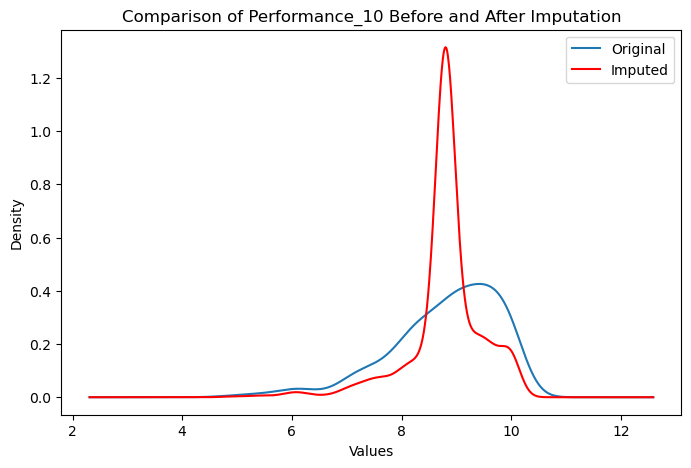

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))

data5["Performance_10"].plot(kind='kde', ax=ax, label='Original')

data6['Performance_10'].plot(kind='kde', ax=ax, color='red', label='Imputed')
ax.legend(loc='best')

ax.set_title("Comparison of Performance_10 Before and After Imputation")
ax.set_xlabel("Values")
ax.set_ylabel("Density")

plt.show()

# 7.Prediction of class 10,12,UG CGPA

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x=data6.drop('Performance_10',axis=1)
y=data6['Performance_10']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
y_pred=lr_clf.predict(x_test)
lr_clf.score(x_test,y_test)

0.959884567192432

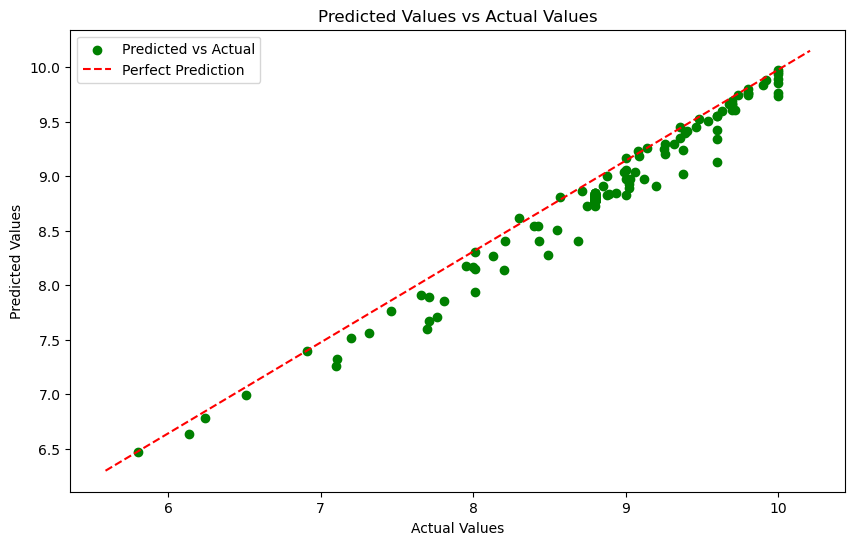

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Predicted Values vs Actual Values')


ax.plot(ax.get_xlim(), ax.get_ylim(), color='red', linestyle='--', label='Perfect Prediction')
ax.legend()

plt.show()

In [50]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9993524526503151

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)
#this much various is due to lots of continious misssing value that we have in original data which we have fillied using imputer

array([0.95766804, 0.96464109, 0.04884429, 0.28792789, 0.12645869,
       0.1647354 , 0.95872322, 0.96059723, 0.1172891 , 0.9626815 ])

In [52]:
from sklearn.linear_model import Ridge
np.random.seed(45)
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9595673714981418

In [53]:
from sklearn import linear_model
model = linear_model.LassoLars(alpha=.1)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9992512992870969

# 8.Now lets Predict Stream Based on Skills of student

1.`Preprocessing `

In [54]:
data7=data4[['Other skills','Stream']]
data7.head(2)

,Other skills,Stream
0,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",Software Engineering
1,"Git, GitHub, Linux, Adobe After Effects, Adobe...",Computer Science & Engineering


In [55]:
data7.isnull().sum()

Other skills    43
Stream           0
dtype: int64

In [56]:
data7.dropna(inplace=True)

In [57]:
data7.isnull().sum()

Other skills    0
Stream          0
dtype: int64

In [58]:
data7['Stream'].value_counts()

Computer Science & Engineering    206
Computer Science                   85
computer science                   64
Information Technology             54
Electronics and Communication      54
                                 ... 
B.E. Computer                       1
cs                                  1
Business Development                1
COMPUTER                            1
Engineering                         1
Name: Stream, Length: 179, dtype: int64

2.Remove all less then 10(which is not good but `we will see how neural network handle it`) frequencty count of Stream for better prediction

In [59]:
Min_count=10
value_count=data7['Stream'].value_counts()
values_to_drop = value_count[value_count <Min_count].index
data8 = data7[~data7['Stream'].isin(values_to_drop)]
data8['Stream'].value_counts()

Computer Science & Engineering                         206
Computer Science                                        85
computer science                                        64
Information Technology                                  54
Electronics and Communication                           54
Data Science                                            46
Mechanical Engineering                                  31
Artificial Intelligence And Data Science                21
Mathematics                                             14
Computer Application                                    13
Data Analytics                                          12
Electronics and Telecommunication Engineering (ETE)     11
Electrical and Electronics Engineering                  11
Statistics                                              11
Civil Engineering                                       11
Artificial Intelligence                                 11
Artificial Intelligence And Machine Learning            

In [60]:
data8.isnull().sum()

Other skills    0
Stream          0
dtype: int64

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

skills = data8['Other skills'].values
streams = data8['Stream'].values

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(skills)
x_train, x_test, y_train, y_test = train_test_split(x, streams, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.3208955223880597

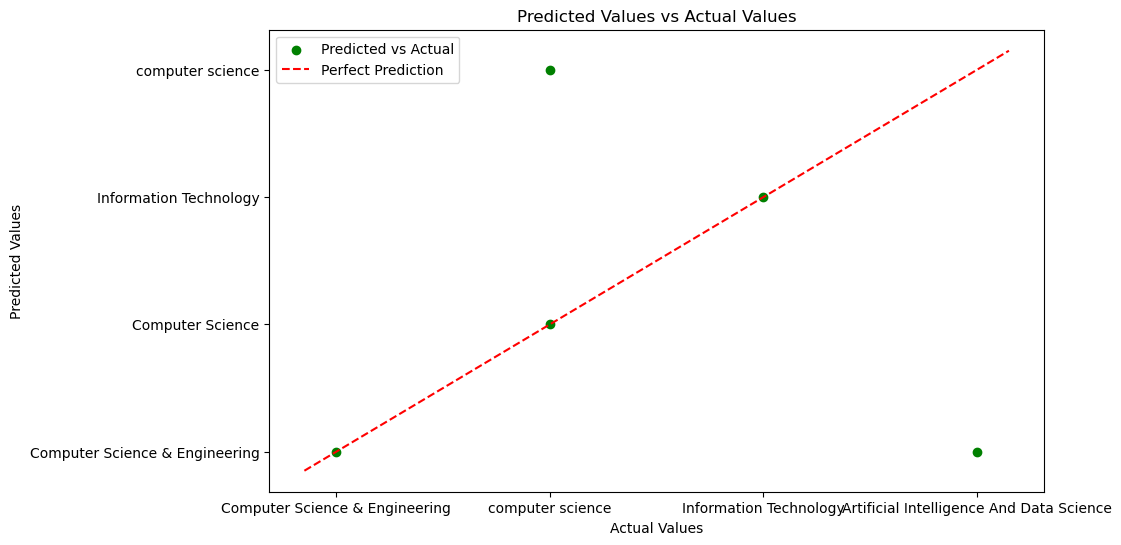

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test[:5], y_pred[:5], color='green', label='Predicted vs Actual')

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Predicted Values vs Actual Values')


ax.plot(ax.get_xlim(), ax.get_ylim(), color='red', linestyle='--', label='Perfect Prediction')
ax.legend()

plt.show()

In [63]:
# Prediction
new_skill = ["Machine Learning,C++", "Digital circuit design"]
new_x = vectorizer.transform(new_skill)
predicted_streams = model.predict(new_x)

for skill, stream in zip(new_skill, predicted_streams):
    print(f"{skill} = Stream: {stream}")

Machine Learning,C++ = Stream: Computer Science & Engineering
Digital circuit design = Stream: Electronics and Communication


Even with 32% accuracy its giving correct outpute beacuse its hard to get good accuracy on small and distinct data

# 9.Prediction using Neural networks
*Neural network perform very good on large data but `not sutable for small data`

In [64]:
Min_count=2
value_count=data7['Stream'].value_counts()
values_to_drop = value_count[value_count <Min_count].index
data9 = data7[~data7['Stream'].isin(values_to_drop)]
data9

,Other skills,Stream
0,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",Software Engineering
1,"Git, GitHub, Linux, Adobe After Effects, Adobe...",Computer Science & Engineering
4,"C++ Programming, Data Science, Machine Learnin...",Computer Science
5,"Data Analytics, Data Science, MS-Excel, R Prog...",Statistics
6,"C++ Programming, CSS, Data Analytics, HTML, MS...",Electronics and Telecommunication Engineering ...
...,...,...
1130,"C Programming, Data Structures, MS-Excel, Mach...",Computer Science & Engineering
1131,"Data Analytics, Amazon Web Services (AWS), Dat...",Mechanical Engineering
1132,"Deep Learning, Docker, HTML, MS-Office, Machin...",Computer Science & Engineering
1133,"Data Science, Deep Learning, English Proficien...",Electronics and Communication


In [65]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

skills = data9['Other skills'].values
streams = data9['Stream'].values

#label encoding
label_encoder = LabelEncoder()
encoded_streams = label_encoder.fit_transform(streams)
num_classes = len(label_encoder.classes_)

# Tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(skills)
sequences = tokenizer.texts_to_sequences(skills)
padded_sequences = pad_sequences(sequences, padding='post')

In [66]:
#LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_length = padded_sequences.shape[1]
learning_rate = 0.0001
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 100)          37500     
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 160,682
Trainable params: 160,682
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, encoded_streams, test_size=0.2, random_state=42)
#model traning
early_stop = EarlyStopping(patience=3, restore_best_weights=True)
x_train_sparse = tf.sparse.reorder(tf.sparse.from_dense(x_train))
model.fit(x_train_sparse, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, callbacks=[early_stop])

loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/10
20/20 [==============================] - 13s 338ms/step - loss: 3.8049 - accuracy: 0.2311 - val_loss: 3.7782 - val_accuracy: 0.3137
Epoch 2/10
20/20 [==============================] - 6s 274ms/step - loss: 3.7635 - accuracy: 0.2574 - val_loss: 3.7129 - val_accuracy: 0.3137
Epoch 3/10
20/20 [==============================] - 5s 265ms/step - loss: 3.6670 - accuracy: 0.2590 - val_loss: 3.4637 - val_accuracy: 0.3137
Epoch 4/10
20/20 [==============================] - 5s 256ms/step - loss: 3.1997 - accuracy: 0.2590 - val_loss: 2.8323 - val_accuracy: 0.3137
Epoch 5/10
20/20 [==============================] - 5s 258ms/step - loss: 2.9879 - accuracy: 0.2590 - val_loss: 2.7804 - val_accuracy: 0.3137
Epoch 6/10
20/20 [==============================] - 5s 259ms/step - loss: 2.9397 - accuracy: 0.2590 - val_loss: 2.7713 - val_accuracy: 0.3137
Epoch 7/10
20/20 [==============================] - 5s 262ms/step - loss: 2.9164 - accuracy: 0.2590 - val_loss: 2.7503 - val_accuracy: 0.3137
Epoch

In [69]:
#predictions
input_skills="Machine Learning,Deep Learning, MySQL, Python"
new_sequences=tokenizer.texts_to_sequences(input_skills)
new_padded_sequences=pad_sequences(new_sequences, maxlen=max_length, padding='post')
predicted_probability=model.predict(new_padded_sequences)
predicted_classes=np.argmax(predicted_probability, axis=1)
predicted_streams=label_encoder.inverse_transform(predicted_classes)

print(f"Inpute Skill: {input_skills}")
print(f"Stream: {predicted_streams}")

1/1 [==============================] - 0s 43ms/step
Inpute Skill: ['Machine Learning,Deep Learning, MySQL, Python']
Stream: ['Computer Science & Engineering']


# Thank You